# Teoría de Grafos
Adrián Fernández Cano

##Librerías

In [274]:
import IPython
%matplotlib inline
#sci py libraries
import numpy as np
import scipy as sp
import scipy.linalg as la
#abstract graphs libraries
import networkx as nx
import random
#ploting and drawing libraries:
from nxpd import draw
import scipy.integrate as sint
import matplotlib.pyplot as plt

<br/>
##Definición de grafo
Un grafo <b>G = (V, E)</b> es una par ordenado donde <b>V</b> es un conjunto normalmente finito de vértices(nodos) unidos
por enlaces (aristas). <b>E</b> es el conjunto de pares ordenados (aristas) que relacionan a estos vértices.


##Definiciones
- Se llama <b>orden</b> del grafo G a su número de vértices, |V|.
- El <b>grado</b> de un vértice es el número de aristas que lo tienen como extremo.
- Un <b>bucle</b> es una arista que relaciona al mismo nodos. El nodo inicial y final coinciden.
- Dos o más aristas que relacionan al mismo par de vertices se denominan <b>aristas múltiples o pararelas</b>.
- Decimos que dos aristas son adyacentes si tienen un extremo en común.
- Un vertice u es <b>adyacente</b> a otro vertice w si el grafo contiene una arista (u,w) que los une.

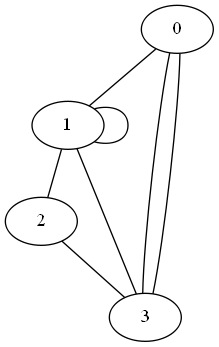

In [275]:
"""Crear multigrafo vacío (sin nodos ni aristas)"""
grafo = nx.MultiGraph() 

"""Crear un 'bundle' de nodos y añadirlos"""
bundle = nx.path_graph(4)
grafo.add_nodes_from(bundle)

""" Establecer las aristas"""
grafo.add_edges_from([(0,1), (1,2), (2,3), (3,1), (0,3), (0,3), (1,1)])
draw(grafo, show='ipynb')

El <b>orden</b> del grafo anterior será -> numVertices = grafo.number_of_nodes() -> 4
El <b>grado</b> del grafo anterior será -> numAristas = grafo.number_of_edges() -> 7
En el nodo 1 tenemos un <b>bucle</b>.
Entre el nodo 0 y 3 tenemos <b>aristas múltiples</b>.
El vertice 2 es <b>adyacente</b> al vertice 3.

##Grafo simple
Un grafo es <b>simple</b> si como mucho entre dos vértices cualesquiera solo existe una arista que los une, no se admiten
ni aristas múltiples ni bucles.
Un grafo que no es simple se denomina <b>multigrafo</b>.

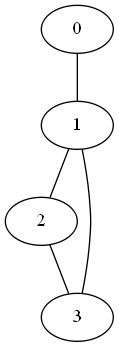

In [276]:
"""Crear grafo vacío (sin nodos ni aristas)"""
grafo = nx.Graph() 

"""Crear un 'bundle' de nodos y añadirlos"""
bundle = nx.path_graph(4)
grafo.add_nodes_from(bundle)

""" Establecer las aristas"""
grafo.add_edges_from([(0,1), (1,2), (2,3), (3,1)])
draw(grafo, show='ipynb')

##Multigrafo o pseudografo
Es un grafo que puede tener <b>aristas multiples</b> entre dos nodos.


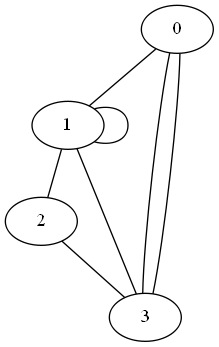

In [277]:
"""Crear multigrafo vacío (sin nodos ni aristas)"""
grafo = nx.MultiGraph() 

"""Crear un 'bundle' de nodos y añadirlos"""
bundle = nx.path_graph(4)
grafo.add_nodes_from(bundle)

""" Establecer las aristas"""
grafo.add_edges_from([(0,1), (1,2), (2,3), (3,1), (0,3), (0,3), (1,1)])
draw(grafo, show='ipynb')

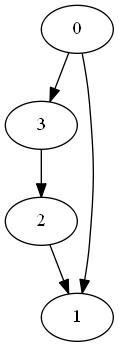

In [278]:
G = nx.DiGraph()
G.add_edges_from([(0,3), (3,2), (0,1), (2,1)])
draw(G, show='ipynb')

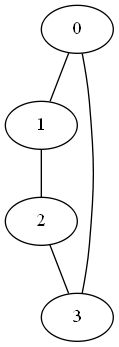

In [279]:

G = np.array([[0,0,0,1],
              [1,0,0,0],
              [0,1,0,1],
              [0,0,1,0]])

G = nx.from_numpy_matrix(G)
draw(G, show='ipynb')

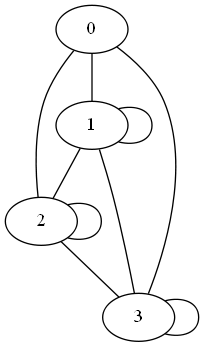

In [280]:
Adj1 = np.array([[0, 3, 1, 2], 
                [3, 1, 1, 1],
                [1, 1, 2, 2],
                [2, 1, 2, 1]
               ])

G1 = nx.from_numpy_matrix(Adj1)

draw(G1, show='ipynb')

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

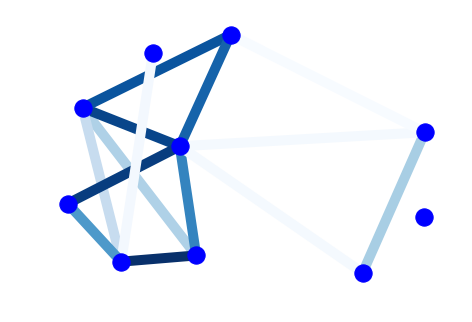

In [281]:

G = nx.gnp_random_graph(10,0.3)
for u,v,d in G.edges(data=True):
    d['weight'] = random.random()

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='b', edgelist=edges, edge_color=weights, width=10.0, edge_cmap=plt.cm.Blues)

